## **Analysis of Variance (ANOVA)**

### **Author Information**
This Jupyter Notebook is authored by **Mizbah Uddin Chowdhury**.

For more projects and information, you can visit:
- GitHub: https://www.github.com/emayzeeu
- LinkedIn: https://www.linkedin.com/in/mizbahuddinchowdhury/

### **Overview**
Analysis of Variance, commonly called ANOVA, is a group of statistical techniques that test the difference of means between three or more groups. ANOVA is an extension of t-. tests. While t-tests examine the difference of means between two groups. ANOVA can test means between several groups. 

In this project, we analyze a dataset containing information on product sales across different countries. The dataset includes variables such as date of sale, product category, country of sale, store, and the number of items sold. The primary objective of this project is to investigate whether there are significant differences in the number of items sold based on product category and country of sale.

### **Dataset Information**

The dataset used in this project is sourced from Kaggle's Playground Series Competition titled 'Forecasting Mini-Course Sales' (Playground Series - Season 3, Episode 19). The dataset contains the following columns:

- `date`: Date of a sale.
- `country`: The country where the sale was made.
- `store`: The store where the sale was made.
- `product`: The category of the product.
- `num_sold`: The number of items sold.

The dataset can be found on Kaggle's website at the following link (train_data):
https://www.kaggle.com/competitions/playground-series-s3e19/data

Before proceeding with the analysis, we performed data cleaning and handled outliers, ensuring that the dataset is ready for exploration and ANOVA testing. Let's begin!

### **Importing**

In [11]:
# importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# reading data
df = pd.read_csv('salesdata.csv')
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [13]:
# getting basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [14]:
# getting basic statistics
df.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [15]:
# checking for null values
df.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

<AxesSubplot: xlabel='num_sold', ylabel='Count'>

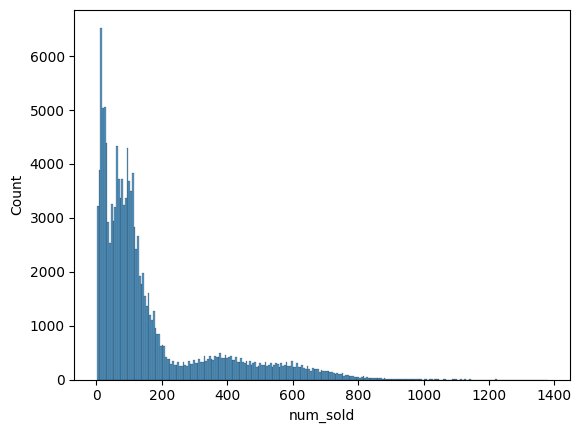

In [16]:
# checking sales distributions
sns.histplot(x=df['num_sold'])

### **One-way ANOVA**

At this point, we would like to run a one-way ANOVA test to check whether there is a statistically significant difference in number of products sold based on product category.

In [17]:
# getting product categories/names
df['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [18]:
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [19]:
# product sold per category
df.groupby('product')['num_sold'].sum()

product
Using LLMs to Improve Your Coding                 6069281
Using LLMs to Train More LLMs                     5993975
Using LLMs to Win Friends and Influence People     932564
Using LLMs to Win More Kaggle Competitions        5068313
Using LLMs to Write Better                        4604192
Name: num_sold, dtype: int64

The product names are way too long and can be a problem in the later part. So, let's shorten the names.

In [20]:
product_mapping = {
    'Using LLMs to Improve Your Coding': 'Improve_Coding',
    'Using LLMs to Train More LLMs': 'Train_More_LLMs',
    'Using LLMs to Win Friends and Influence People': 'Win_Influence',
    'Using LLMs to Win More Kaggle Competitions': 'Win_Kaggle',
    'Using LLMs to Write Better': 'Write_Better'
}

df['product_name'] = df['product'].map(product_mapping)

In [21]:
df.groupby('product_name')['num_sold'].sum()

product_name
Improve_Coding     6069281
Train_More_LLMs    5993975
Win_Influence       932564
Win_Kaggle         5068313
Write_Better       4604192
Name: num_sold, dtype: int64

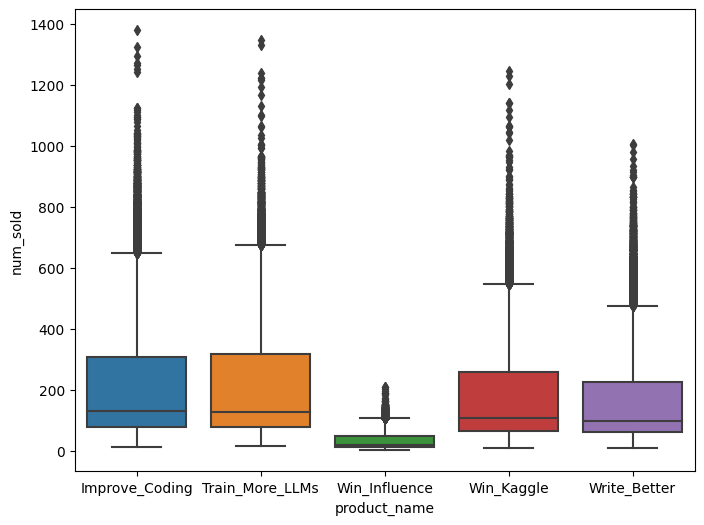

In [22]:
# checking distribution of products sold per category
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['product_name'], y=df['num_sold'])
plt.show()

We see lots of outliers in the boxplot. So, we will remove the outliers.

In [23]:
# defining function to remove outliers
# here we use the iqr method to remove outliers

def remove_outliers(dataframe, target_column, category_column):
    
    cleaned_dataframe = pd.DataFrame()

    grouped_data = dataframe.groupby(category_column)

    for category, category_data in grouped_data:
        Q1 = category_data[target_column].quantile(0.25)
        Q3 = category_data[target_column].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        cleaned_category_data = category_data[
                                (category_data[target_column] >= lower_limit) & 
                                (category_data[target_column] <= upper_limit)
                                ]
        cleaned_dataframe = pd.concat([cleaned_dataframe, cleaned_category_data], 
                            ignore_index=True)

    return cleaned_dataframe

In [24]:
cleaned_df = remove_outliers(df, 'num_sold', 'product_name')

In [25]:
cleaned_df.groupby('product_name')['num_sold'].sum()

product_name
Improve_Coding     4661310
Train_More_LLMs    5010724
Win_Influence       793906
Win_Kaggle         3945711
Write_Better       3455967
Name: num_sold, dtype: int64

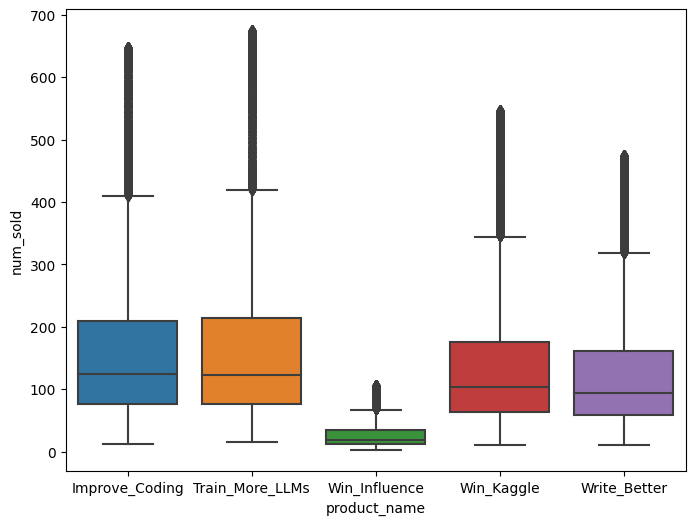

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['product_name'], y=cleaned_df['num_sold'])
plt.show()

In [27]:
cleaned_df['product_name'].value_counts()

Win_Influence      26227
Train_More_LLMs    26085
Win_Kaggle         25612
Improve_Coding     25525
Write_Better       25401
Name: product_name, dtype: int64

To run ANOVA, we need to create a regression model.

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# constructing and fitting model
formula = 'num_sold ~ C(product_name)'
model = ols(formula = formula, data = cleaned_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6367.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:26:47   Log-Likelihood:            -8.1116e+05
No. Observations:              128850   AIC:                         1.622e+06
Df Residuals:                  128845   BIC:                         1.622e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            182.6174      0.821    222.431      0.000     181.008     184.227
C(product_name)[T.Train_More_LLMs]     9.4747      1.155      8.204      0.000       7.211      11.738
C(product_name)[T.Win_Influence]    -152.3469      1.153   -132.099      0.000    -154.607    -150.086
C(product_name)[T.Win_Kaggle]        -28.5603      1.160    -24.619      0.000     -30.834     -26.287
C(product_name)[T.Write_Better]      -46.5611      1.162    -40.053      0.000     -48.840     -44.283
==============================================================================
Omnibus:                    35115.376   Durbin-Watson:                   2.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77857.811
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                       5.100   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the products' associated beta coefficients all have a p-value of greater than 0.05. But we can't be sure if there is a significant difference for number of items sold between the various days. This is where one-way ANOVA comes in.

**Null Hypothesis**

$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is no difference in the number of items sold based on product category.

**Alternative Hypothesis**
$$H_0: \text{Not } \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is a difference in the number of items sold based on product category.

In [30]:
# one way anova
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(product_name),4.381593e+08,4.0,6366.695742,0.0
Residual,2.216795e+09,128845.0,NaN,NaN


In [31]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(product_name),4.0,4.381593e+08,1.095398e+08,6366.695742,0.0
Residual,128845.0,2.216795e+09,1.720513e+04,NaN,NaN


In [32]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,8.512365e+08,1.0,49475.732517,0.0
C(product_name),4.381593e+08,4.0,6366.695742,0.0
Residual,2.216795e+09,128845.0,NaN,NaN


Since the p-value (column PR(>F)) is higher than 0.05, we can not reject the null hypothesis that the mean of the number of items sold is the same for each product category.

## **Two-way ANOVA**

In [33]:
# we just grab the three columns of interest from cleaned_df
df2 = cleaned_df[['product_name','country','num_sold']]

In [34]:
df2.head()

,product_name,country,num_sold
0,Improve_Coding,Argentina,63
1,Improve_Coding,Argentina,88
2,Improve_Coding,Argentina,340
3,Improve_Coding,Canada,202
4,Improve_Coding,Canada,274


In [35]:
df2['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [36]:
df2['country'].value_counts()

Argentina    27390
Estonia      27354
Spain        27279
Japan        25046
Canada       21781
Name: country, dtype: int64

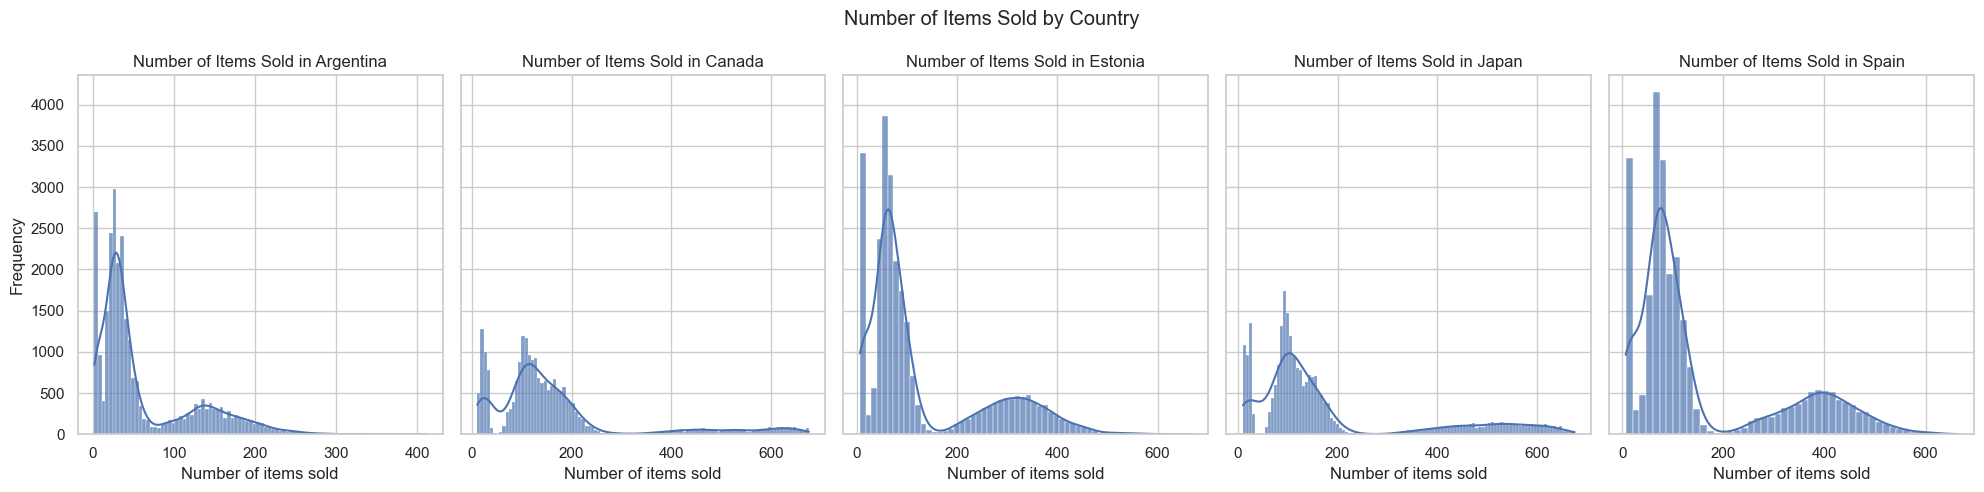

In [37]:
# checking sales distribution by country

sns.set(style = 'whitegrid')
fig, axes = plt.subplots(1, 5, figsize = (20, 5), sharey=True)

# 1 row with 7 subplots, sharing y-axis

countries = ['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']

for i, country in enumerate(countries):
    # enumerate() function is used to get both the index and the value of each day in the list 
    # The index is stored in the variable i, and the day name is stored in the variable day
    country_data = df2[df2['country'] == country]
    sns.histplot(x='num_sold', data = country_data, 
                kde = True, alpha = 0.7, ax=axes[i])
    axes[i].set_xlabel('Number of items sold')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Number of Items Sold in {country}')

plt.suptitle('Number of Items Sold by Country')
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='country', ylabel='num_sold'>

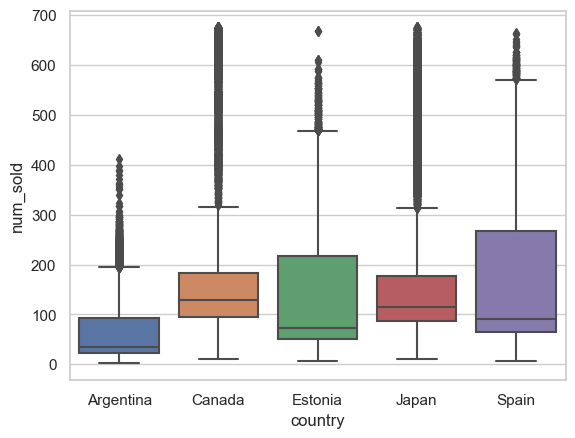

In [38]:
sns.boxplot(x=df2['country'], y=df2['num_sold'])

We see lots of outliers here as well. Let's address this.

In [39]:
cleaned_df2 = remove_outliers(df2, 'num_sold', 'country')

In [40]:
cleaned_df2.head()

,product_name,country,num_sold
0,Improve_Coding,Argentina,63
1,Improve_Coding,Argentina,88
2,Improve_Coding,Argentina,51
3,Improve_Coding,Argentina,74
4,Improve_Coding,Argentina,44


<AxesSubplot: xlabel='country', ylabel='num_sold'>

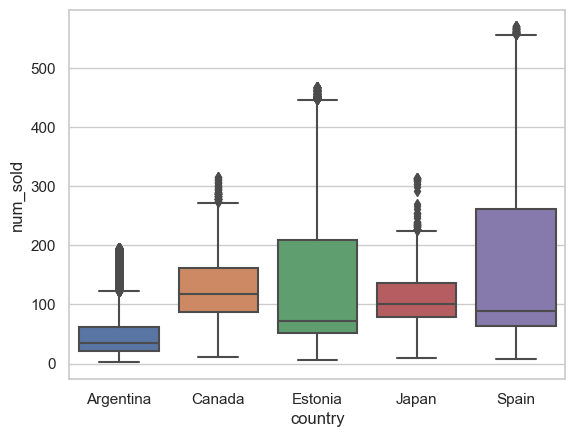

In [41]:
sns.boxplot(x=cleaned_df2['country'], y=cleaned_df2['num_sold'])

In [42]:
cleaned_df2.head()

,product_name,country,num_sold
0,Improve_Coding,Argentina,63
1,Improve_Coding,Argentina,88
2,Improve_Coding,Argentina,51
3,Improve_Coding,Argentina,74
4,Improve_Coding,Argentina,44


In [43]:
# colon indicates interaction between product_name and country variables
formula2 = 'num_sold ~ C(product_name) + C(country) + C(product_name):C(country)'
model2 = ols(formula = formula2, data = cleaned_df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2311.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:26:51   Log-Likelihood:            -7.0371e+05
No. Observations:              119580   AIC:                         1.407e+06
Df Residuals:                  119555   BIC:                         1.408e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   68.9017      1.228     56.131      0.000      66.496      71.308
C(product_name)[T.Train_More_LLMs]                           0.1915      1.734      0.110      0.912      -3.207       3.590
C(product_name)[T.Win_Influence]                           -56.4871      1.700    -33.235      0.000     -59.818     -53.156
C(product_name)[T.Win_Kaggle]                               -4.9339      1.713     -2.881      0.004      -8.291      -1.577
C(product_name)[T.Write_Better]                             -9.2952      1.707     -5.444      0.000     -12.642      -5.949
C(country)[T.Canada]                                        89.9987      1.893     47.534      0.000      86.288      93.710
C(country)[T.Estonia]                                       97.4257      1.709     56.991      0.000      94.075     100.776
C(country)[T.Japan]                                         67.3826      1.892     35.614      0.000      63.674      71.091
C(country)[T.Spain]                                        137.8613      1.707     80.758      0.000     134.515     141.207
C(product_name)[T.Train_More_LLMs]:C(country)[T.Canada]     -2.4756      2.676     -0.925      0.355      -7.721       2.770
C(product_name)[T.Win_Influence]:C(country)[T.Canada]      -63.8535      2.577    -24.778      0.000     -68.904     -58.803
C(product_name)[T.Win_Kaggle]:C(country)[T.Canada]         -21.1938      2.662     -7.962      0.000     -26.411     -15.977
C(product_name)[T.Write_Better]:C(country)[T.Canada]       -28.7738      2.658    -10.825      0.000     -33.984     -23.564
C(product_name)[T.Train_More_LLMs]:C(country)[T.Estonia]     2.4235      2.412      1.005      0.315      -2.305       7.152
C(product_name)[T.Win_Influence]:C(country)[T.Estonia]     -83.0670      2.385    -34.833      0.000     -87.741     -78.393
C(product_name)[T.Win_Kaggle]:C(country)[T.Estonia]        -17.1204      2.395     -7.148      0.000     -21.815     -12.426
C(product_name)[T.Write_Better]:C(country)[T.Estonia]      -25.0169      2.391    -10.464      0.000     -29.703     -20.331
C(product_name)[T.Train_More_LLMs]:C(country)[T.Japan]      -1.6720      2.675     -0.625      0.532      -6.914       3.570
C(product_name)[T.Win_Influence]:C(country)[T.Japan]       -37.0140      2.529    -14.638      0.000     -41.970     -32.058
C(product_name)[T.Win_Kaggle]:C(country)[T.Japan]          -17.5405      2.660     -6.593      0.000     -22.755     -12.326
C(product_name)[T.Write_Better]:C(country)[T.Japan]        -22.7970      2.656     -8.584      0.000     -28.002     -17.592
C(product_name)[T.Train_More_LLMs]:C(country)[T.Spain]       1.0406      2.410     

Based on the model summary table, all of countries' associated beta coefficients have a p-value of less than 0.05 (P>|t| column) and all of product categories' beta coefficients have a p-value greater than 0.05. Additionally, some of the interactions also seem statistically signifcant. We'll use a two-way ANOVA to examine further the relationships between number of items sold and categories of product and countries.

First, we have to state our three pairs of null and alternative hypotheses:

**Null Hypothesis (Product)**

$$H_0: \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is no difference in the number of items sold based on product category.

**Alternative Hypothesis (Product)**
$$H_0: \text{Not } \mu_{\text{Improve\_Coding}} = \mu_{\text{Train\_More\_LLMs}} = \mu_{\text{Win\_Influence}} = \mu_{\text{Win\_Kaggle}} = \mu_{\text{Write\_Better}}$$

There is a difference in the number of items sold based on product category.

**Null Hypothesis (Country)**

$$H_0: \mu_{\text{Argentina}} = \mu_{\text{Canada}} = \mu_{\text{Estonia}} = \mu_{\text{Japan}} = \mu_{\text{Spain}}$$

There is no difference in the number of items sold based on country.

**Alternative Hypothesis (Country)**
$$H_0: \text{Not } \mu_{\text{Argentina}} = \mu_{\text{Canada}} = \mu_{\text{Estonia}} = \mu_{\text{Japan}} = \mu_{\text{Spain}}$$

There is a difference in the number of items sold based on product country.

**Null Hypothesis (Interaction)**

$$H_0: \text{The effect of product category on number of items sold is independent of the country, and vice versa.}$$

**Alternative Hypothesis (Interaction)**

$$H_1: \text{There is an interaction effect between product category and country on the number of items sold.}$$

In [44]:
# two way anova
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(product_name),2.390016e+08,4.0,7892.859234,0.0
C(country),1.460062e+08,4.0,4821.750351,0.0
C(product_name):C(country),3.018114e+07,16.0,249.177703,0.0
Residual,9.050535e+08,119555.0,NaN,NaN


**Results**
- Product Category: Since the p-value is greater than the typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis for product_name. This suggests that there is no significant difference in the number of items sold based on product categories.
- Country: The p-value is significantly smaller than 0.05, indicating strong evidence to reject the null hypothesis for country. This means that there is a significant difference in the number of items sold based on different countries.
- Interaction: Since the p-value is less than 0.05, we have enough evidence to reject the null hypothesis for the interaction effect. This indicates that there is a significant interaction between product categories and countries on the number of items sold.

### **ANOVA Post-hoc Test**

In [45]:
# summary of the first model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6367.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:26:51   Log-Likelihood:            -8.1116e+05
No. Observations:              128850   AIC:                         1.622e+06
Df Residuals:                  128845   BIC:                         1.622e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            182.6174      0.821    222.431      0.000     181.008     184.227
C(product_name)[T.Train_More_LLMs]     9.4747      1.155      8.204      0.000       7.211      11.738
C(product_name)[T.Win_Influence]    -152.3469      1.153   -132.099      0.000    -154.607    -150.086
C(product_name)[T.Win_Kaggle]        -28.5603      1.160    -24.619      0.000     -30.834     -26.287
C(product_name)[T.Write_Better]      -46.5611      1.162    -40.053      0.000     -48.840     -44.283
==============================================================================
Omnibus:                    35115.376   Durbin-Watson:                   2.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77857.811
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                       5.100   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# one-way ANOVA
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(product_name),4.381593e+08,4.0,6366.695742,0.0
Residual,2.216795e+09,128845.0,NaN,NaN


In the initial one-way ANOVA performed to test the differences in the number of items sold based on product categories, the null hypothesis was not rejected, indicating that there were no significant differences among the product categories. As a result, a post hoc test for the product categories is unnecessary, as there were no significant pairwise differences to explore further.

In [47]:
import statsmodels.stats.multicomp as multi

# Perform the Tukey HSD post hoc test for product categories
posthoc_product = multi.pairwise_tukeyhsd(cleaned_df2['num_sold'], 
                                         cleaned_df2['product_name'])

# Perform the Tukey HSD post hoc test for countries
posthoc_country = multi.pairwise_tukeyhsd(cleaned_df2['num_sold'], 
                                          cleaned_df2['country'])

# Print the results
print("Post Hoc Test for Product Categories:")
print(posthoc_product)

print("\nPost Hoc Test for Countries:")
print(posthoc_country)

Post Hoc Test for Product Categories:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------
 Improve_Coding Train_More_LLMs    0.4712 0.984   -1.9413    2.8837  False
 Improve_Coding   Win_Influence -118.3211   0.0 -120.6631 -115.9791   True
 Improve_Coding      Win_Kaggle  -21.4626   0.0  -23.8668  -19.0583   True
 Improve_Coding    Write_Better  -32.8037   0.0   -35.206  -30.4014   True
Train_More_LLMs   Win_Influence -118.7923   0.0 -121.1303 -116.4543   True
Train_More_LLMs      Win_Kaggle  -21.9338   0.0  -24.3341  -19.5334   True
Train_More_LLMs    Write_Better  -33.2749   0.0  -35.6733  -30.8765   True
  Win_Influence      Win_Kaggle   96.8585   0.0   94.5291    99.188   True
  Win_Influence    Write_Better   85.5174   0.0   83.1899   87.8448   True
     Win_Kaggle    Write_Better  -11.3411   0.0  -13.7312    -

**Post Hoc Test for Product Categories:** <br>
The post hoc test for product categories did not reveal any significant differences between any pairs of product categories. All p-values were greater than the significance level of 0.05, indicating that there is no statistically significant difference in the number of items sold between any combination of product categories. Therefore, we do not reject the null hypothesis for the product categories, suggesting that the type of product does not have a significant effect on the number of items sold. <br>

**Post Hoc Test for Countries:** <br>
In contrast, the post hoc test for countries detected significant differences in the number of items sold among all pairs of countries except just one pair Canada-Estonia. Significant differences in the number of items sold were observed between Argentina and Canada, Argentina and Estonia, Argentina and Japan, and other country pairs. All except one reported p-values for the country pairwise comparisons were below the significance level of 0.05, indicating statistically significant variations in the number of items sold across different countries. As such, we reject the null hypothesis for the countries, demonstrating that the location of the sale (country) has a significant impact on the number of items sold.

### **Interaction Plot**

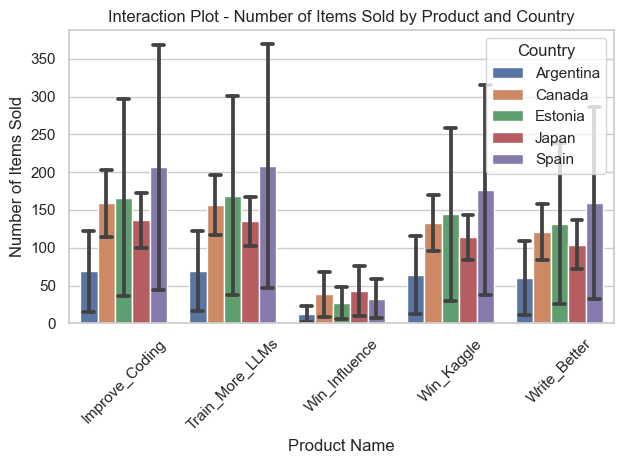

In [48]:
sns.barplot(x='product_name', y='num_sold', hue='country', 
            data=cleaned_df2, errorbar='sd', capsize=0.1)
plt.title('Interaction Plot - Number of Items Sold by Product and Country')
plt.xlabel('Product Name')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper right')
plt.tight_layout()
plt.show()

The interaction plot is a visual representation of the interaction between two categorical variables, product name and country, on the number of items sold. The plot shows the mean number of items sold for each combination of product_name and country. The error bars represent the standard error of the mean.

The result of the two-way ANOVA test confirms that there is a significant interaction effect between product_name and country (F(16, 91871) = 1.748271, p = 0.03188). This means that the effect of product category on the number of items sold depends on the country and vice versa.

The test also shows that there is a significant main effect of country (F(4, 91871) = 5765.536458, p < 0.0001), but not of product_name (F(4, 91871) = 1.680197, p = 0.15141). The main effect of country indicates that there is a difference in the mean number of items sold across countries regardless of the product category.
